In [73]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
import statsmodels.api as sm

In [77]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [78]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pd.pandas.set_option('display.max_columns',None)

In [79]:
x_train = pd.read_csv(r'C:\KHILADI\x_train_house_price.csv')
y_train = pd.read_csv(r'C:\KHILADI\y_train_house_price.csv')

In [80]:
x_train.isnull().sum().sum()

0

In [81]:
x_test.isnull().sum().sum()

0

In [82]:
x_train.shape

(1021, 50)

In [83]:
x_test.shape

(439, 50)

In [84]:
y_train.shape

(1021, 1)

In [85]:
y_test.shape

(439, 1)

In [86]:
x_train.head()

,MSZoning,LotArea,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,SalePrice,LotFrontage_random
0,4,2887,1,3,4,3,2,6,5,14,13,5,1,0.0,2,3,5,4,3,3,7,1003,288,1291,5,1,3,1291,0,1291,1,1,2,1,4,6,1,4,1,2,431,4,2,3,307,0,0,2,173000,86.0
1,4,7207,2,2,2,3,2,5,7,52,2,5,1,0.0,2,4,3,2,3,5,5,696,162,858,4,1,3,858,0,858,1,1,2,1,2,4,0,2,1,0,0,1,1,3,117,0,0,0,116500,50.0
2,4,9060,1,2,2,3,2,6,5,71,60,5,1,0.0,2,3,3,2,3,3,4,204,356,560,3,1,3,698,560,1258,0,1,2,1,2,6,0,2,1,1,280,4,2,2,0,0,0,1,105000,60.0
3,4,8400,1,1,2,3,2,2,5,90,60,5,1,0.0,2,3,3,2,2,2,4,290,0,290,3,0,1,438,0,438,0,1,1,1,1,3,0,2,1,1,246,4,2,1,0,0,0,1,60000,60.0
4,4,7844,1,2,2,3,4,6,7,32,32,4,3,203.0,2,3,3,2,3,2,6,209,463,672,3,1,3,672,728,1400,0,1,3,1,2,6,1,4,2,2,440,4,2,3,0,0,0,4,149500,74.0


In [87]:
x_train.drop('SalePrice',axis=1,inplace=True)
x_test.drop('SalePrice',axis=1,inplace=True)

# Feature Selection 

In [88]:
xt = x_train.copy()

In [89]:
xt.head()

,MSZoning,LotArea,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,LotFrontage_random
0,4,2887,1,3,4,3,2,6,5,14,13,5,1,0.0,2,3,5,4,3,3,7,1003,288,1291,5,1,3,1291,0,1291,1,1,2,1,4,6,1,4,1,2,431,4,2,3,307,0,0,2,86.0
1,4,7207,2,2,2,3,2,5,7,52,2,5,1,0.0,2,4,3,2,3,5,5,696,162,858,4,1,3,858,0,858,1,1,2,1,2,4,0,2,1,0,0,1,1,3,117,0,0,0,50.0
2,4,9060,1,2,2,3,2,6,5,71,60,5,1,0.0,2,3,3,2,3,3,4,204,356,560,3,1,3,698,560,1258,0,1,2,1,2,6,0,2,1,1,280,4,2,2,0,0,0,1,60.0
3,4,8400,1,1,2,3,2,2,5,90,60,5,1,0.0,2,3,3,2,2,2,4,290,0,290,3,0,1,438,0,438,0,1,1,1,1,3,0,2,1,1,246,4,2,1,0,0,0,1,60.0
4,4,7844,1,2,2,3,4,6,7,32,32,4,3,203.0,2,3,3,2,3,2,6,209,463,672,3,1,3,672,728,1400,0,1,3,1,2,6,1,4,2,2,440,4,2,3,0,0,0,4,74.0


In [90]:
cols =['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch','YearBuilt','YearRemodAdd','YrSold','LotFrontage_random']

In [91]:
scaler=StandardScaler()

xt[cols] = scaler.fit_transform(xt[cols])

In [92]:
xt.head()

,MSZoning,LotArea,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,LotFrontage_random
0,4,-0.746475,1,3,4,3,2,6,5,-0.829775,-0.600656,5,1,-0.567673,2,3,5,4,3,3,7,1.305336,-0.642618,0.574446,5,1,3,0.345415,-0.804064,-0.445621,1,1,2,1,4,6,1,4,1,2,-0.183130,4,2,3,1.667466,-0.700742,-0.367671,-0.120502,0.731439
1,4,-0.326700,2,2,2,3,2,5,7,0.427199,-1.137199,5,1,-0.567673,2,4,3,2,3,5,5,0.591093,-0.933631,-0.481045,4,1,3,-0.812427,-0.804064,-1.282235,1,1,2,1,2,4,0,2,1,0,-2.247917,1,1,3,0.177390,-0.700742,-0.367671,-1.611809,-0.841598
2,4,-0.146643,1,2,2,3,2,6,5,1.055686,1.691849,5,1,-0.567673,2,3,3,2,3,3,4,-0.553558,-0.485564,-1.207457,3,1,3,-1.240267,0.467486,-0.509381,0,1,2,1,2,6,0,2,1,1,-0.906524,4,2,2,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643
3,4,-0.210776,1,1,2,3,2,2,5,1.684173,1.691849,5,1,-0.567673,2,3,3,2,2,2,4,-0.353477,-1.307790,-1.865616,3,0,1,-1.935506,-0.804064,-2.093732,0,1,1,1,1,3,0,2,1,1,-1.069407,4,2,1,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643
4,4,-0.264802,1,2,2,3,4,6,7,-0.234367,0.326102,4,3,0.555646,2,3,3,2,3,2,6,-0.541926,-0.238434,-0.934443,3,1,3,-1.309791,0.848952,-0.235018,0,1,3,1,2,6,1,4,2,2,-0.140014,4,2,3,-0.740184,-0.700742,-0.367671,1.370804,0.207093


In [94]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [95]:
corrFilter(xt, 0.8)

GrLivArea   TotRmsAbvGrd    0.826465
GarageQual  GarageCond      0.838721
GarageCars  GarageArea      0.895421
MSZoning    MSZoning             NaN
dtype: float64

In [96]:
corrFilter(xt, 0.6)

BsmtQual      YearBuilt      -0.720497
Neighborhood  YearBuilt      -0.645406
Foundation    YearBuilt      -0.640392
GarageFinish  YearBuilt      -0.627086
KitchenQual   YearRemodAdd   -0.622523
GarageCars    OverallQual     0.601400
2ndFlrSF      TotRmsAbvGrd    0.614400
GarageFinish  GarageType      0.621888
FullBath      GrLivArea       0.638184
ExterQual     Neighborhood    0.642552
OverallQual   KitchenQual     0.651366
ExterQual     BsmtQual        0.652500
BsmtFullBath  BsmtFinSF1      0.655097
MasVnrType    MasVnrArea      0.656815
BsmtQual      Neighborhood    0.672084
              Foundation      0.675463
              OverallQual     0.676613
BedroomAbvGr  TotRmsAbvGrd    0.680461
Neighborhood  OverallQual     0.682079
ExterQual     OverallQual     0.697000
2ndFlrSF      GrLivArea       0.703251
KitchenQual   ExterQual       0.703815
BsmtFinSF1    BsmtFinType1    0.728181
HouseStyle    2ndFlrSF        0.751711
1stFlrSF      TotalBsmtSF     0.790059
TotRmsAbvGrd  GrLivArea  

Looks like 'GarageCars' should be removed

In [97]:
xt.drop('GarageCars',axis=1,inplace=True)

In [98]:
vif_new = pd.DataFrame()
vif_new["feature"] = xt.columns
  
vif_new["VIF"] = [variance_inflation_factor(xt.values, i)
                          for i in range(len(xt.columns))]

vif_new

,feature,VIF
0,MSZoning,72.549134
1,LotArea,1.323184
2,LotShape,10.952091
3,LandContour,57.622052
4,Neighborhood,19.740375
5,BldgType,43.499888
6,HouseStyle,27.180551
7,OverallQual,77.890238
8,OverallCond,49.702978
9,YearBuilt,5.860504


In [99]:
xt.drop(['GrLivArea'],axis=1,inplace=True)

In [100]:
vif_new = pd.DataFrame()
vif_new["feature"] = xt.columns

vif_new["VIF"] = [variance_inflation_factor(xt.values, i)
                          for i in range(len(xt.columns))]

vif_new.loc[vif_new['VIF']>5]

,feature,VIF
0,MSZoning,71.932908
2,LotShape,10.925193
3,LandContour,57.445483
4,Neighborhood,19.717227
5,BldgType,43.397787
6,HouseStyle,26.738346
7,OverallQual,77.363879
8,OverallCond,49.700029
9,YearBuilt,5.732400
11,RoofStyle,85.942647


In [101]:
corrFilter(xt, 0.6)

BsmtQual      YearBuilt      -0.720497
Neighborhood  YearBuilt      -0.645406
YearBuilt     Foundation     -0.640392
              GarageFinish   -0.627086
YearRemodAdd  KitchenQual    -0.622523
TotRmsAbvGrd  2ndFlrSF        0.614400
GarageType    GarageFinish    0.621888
ExterQual     Neighborhood    0.642552
KitchenQual   OverallQual     0.651366
BsmtQual      ExterQual       0.652500
BsmtFinSF1    BsmtFullBath    0.655097
MasVnrArea    MasVnrType      0.656815
Neighborhood  BsmtQual        0.672084
BsmtQual      Foundation      0.675463
              OverallQual     0.676613
TotRmsAbvGrd  BedroomAbvGr    0.680461
Neighborhood  OverallQual     0.682079
ExterQual     OverallQual     0.697000
KitchenQual   ExterQual       0.703815
BsmtFinSF1    BsmtFinType1    0.728181
HouseStyle    2ndFlrSF        0.751711
1stFlrSF      TotalBsmtSF     0.790059
GarageQual    GarageCond      0.838721
MSZoning      MSZoning             NaN
dtype: float64

In [102]:
xt.drop(['GarageCond'],axis=1,inplace=True)

In [103]:
vif_new = pd.DataFrame()
vif_new["feature"] = xt.columns

vif_new["VIF"] = [variance_inflation_factor(xt.values, i)
                          for i in range(len(xt.columns))]

vif_new.loc[vif_new['VIF']>5]

,feature,VIF
0,MSZoning,71.932391
2,LotShape,10.924039
3,LandContour,57.386908
4,Neighborhood,19.683659
5,BldgType,43.386694
6,HouseStyle,26.648448
7,OverallQual,77.167424
8,OverallCond,49.695852
9,YearBuilt,5.720435
11,RoofStyle,85.115887


In [104]:
xt.drop(['MSZoning','RoofStyle'],axis=1,inplace=True)

In [105]:
vif_new = pd.DataFrame()
vif_new["feature"] = xt.columns

vif_new["VIF"] = [variance_inflation_factor(xt.values, i)
                          for i in range(len(xt.columns))]

vif_new.loc[vif_new['VIF']>5]

,feature,VIF
1,LotShape,10.889840
2,LandContour,57.020181
3,Neighborhood,19.580663
4,BldgType,41.040478
5,HouseStyle,26.616226
6,OverallQual,76.135172
7,OverallCond,49.633437
8,YearBuilt,5.568058
10,MasVnrType,8.701819
12,ExterQual,19.212041


In [106]:
corrFilter(xt, 0.67)

BsmtQual      YearBuilt      -0.720497
              Neighborhood    0.672084
              Foundation      0.675463
OverallQual   BsmtQual        0.676613
BedroomAbvGr  TotRmsAbvGrd    0.680461
OverallQual   Neighborhood    0.682079
ExterQual     OverallQual     0.697000
KitchenQual   ExterQual       0.703815
BsmtFinType1  BsmtFinSF1      0.728181
2ndFlrSF      HouseStyle      0.751711
TotalBsmtSF   1stFlrSF        0.790059
LotArea       LotArea              NaN
dtype: float64

In [107]:
xt.drop(['ExterCond','Electrical'],axis=1,inplace=True)

In [108]:
vif_new = pd.DataFrame()
vif_new["feature"] = xt.columns

vif_new["VIF"] = [variance_inflation_factor(xt.values, i)
                          for i in range(len(xt.columns))]

vif_new.loc[vif_new['VIF']>5]

,feature,VIF
1,LotShape,10.884761
2,LandContour,56.325623
3,Neighborhood,19.546282
4,BldgType,39.763961
5,HouseStyle,26.481751
6,OverallQual,75.608378
7,OverallCond,46.412396
8,YearBuilt,5.541512
10,MasVnrType,8.698861
12,ExterQual,19.171768


In [109]:
corrFilter(xt, 0.6)

BsmtQual      YearBuilt      -0.720497
Neighborhood  YearBuilt      -0.645406
Foundation    YearBuilt      -0.640392
YearBuilt     GarageFinish   -0.627086
KitchenQual   YearRemodAdd   -0.622523
2ndFlrSF      TotRmsAbvGrd    0.614400
GarageFinish  GarageType      0.621888
ExterQual     Neighborhood    0.642552
KitchenQual   OverallQual     0.651366
ExterQual     BsmtQual        0.652500
BsmtFullBath  BsmtFinSF1      0.655097
MasVnrType    MasVnrArea      0.656815
Neighborhood  BsmtQual        0.672084
Foundation    BsmtQual        0.675463
BsmtQual      OverallQual     0.676613
BedroomAbvGr  TotRmsAbvGrd    0.680461
OverallQual   Neighborhood    0.682079
ExterQual     OverallQual     0.697000
KitchenQual   ExterQual       0.703815
BsmtFinSF1    BsmtFinType1    0.728181
2ndFlrSF      HouseStyle      0.751711
1stFlrSF      TotalBsmtSF     0.790059
LotArea       LotArea              NaN
dtype: float64

In [110]:
xt.drop(['OverallQual','TotRmsAbvGrd'],axis=1,inplace=True)

In [111]:
vif_new = pd.DataFrame()
vif_new["feature"] = xt.columns

vif_new["VIF"] = [variance_inflation_factor(xt.values, i)
                          for i in range(len(xt.columns))]

vif_new.loc[vif_new['VIF']>5]

,feature,VIF
1,LotShape,10.860419
2,LandContour,55.898601
3,Neighborhood,18.918479
4,BldgType,38.615351
5,HouseStyle,25.888027
6,OverallCond,45.317736
7,YearBuilt,5.450441
9,MasVnrType,8.477115
11,ExterQual,18.515887
12,Foundation,41.116321


In [112]:
corrFilter(xt, 0.6)

BsmtQual      YearBuilt      -0.720497
Neighborhood  YearBuilt      -0.645406
YearBuilt     Foundation     -0.640392
              GarageFinish   -0.627086
KitchenQual   YearRemodAdd   -0.622523
GarageType    GarageFinish    0.621888
Neighborhood  ExterQual       0.642552
ExterQual     BsmtQual        0.652500
BsmtFullBath  BsmtFinSF1      0.655097
MasVnrArea    MasVnrType      0.656815
BsmtQual      Neighborhood    0.672084
Foundation    BsmtQual        0.675463
KitchenQual   ExterQual       0.703815
BsmtFinType1  BsmtFinSF1      0.728181
2ndFlrSF      HouseStyle      0.751711
TotalBsmtSF   1stFlrSF        0.790059
LotArea       LotArea              NaN
dtype: float64

In [113]:
xt.drop(['BsmtCond','LandContour'],axis=1,inplace=True)

In [114]:
vif_new = pd.DataFrame()
vif_new["feature"] = xt.columns

vif_new["VIF"] = [variance_inflation_factor(xt.values, i)
                          for i in range(len(xt.columns))]

vif_new.loc[vif_new['VIF']>5]

,feature,VIF
1,LotShape,10.814709
2,Neighborhood,18.893305
3,BldgType,37.209809
4,HouseStyle,25.692528
5,OverallCond,41.556699
6,YearBuilt,5.396611
8,MasVnrType,8.428598
10,ExterQual,18.378756
11,Foundation,39.972281
12,BsmtQual,21.700698


In [115]:
corrFilter(xt, 0.6)

BsmtQual      YearBuilt      -0.720497
Neighborhood  YearBuilt      -0.645406
YearBuilt     Foundation     -0.640392
              GarageFinish   -0.627086
KitchenQual   YearRemodAdd   -0.622523
GarageType    GarageFinish    0.621888
Neighborhood  ExterQual       0.642552
ExterQual     BsmtQual        0.652500
BsmtFullBath  BsmtFinSF1      0.655097
MasVnrArea    MasVnrType      0.656815
BsmtQual      Neighborhood    0.672084
Foundation    BsmtQual        0.675463
KitchenQual   ExterQual       0.703815
BsmtFinType1  BsmtFinSF1      0.728181
2ndFlrSF      HouseStyle      0.751711
TotalBsmtSF   1stFlrSF        0.790059
LotArea       LotArea              NaN
dtype: float64

In [116]:
xt.drop(['Foundation'],axis=1,inplace=True)

In [117]:
vif_new = pd.DataFrame()
vif_new["feature"] = xt.columns

vif_new["VIF"] = [variance_inflation_factor(xt.values, i)
                          for i in range(len(xt.columns))]

vif_new.loc[vif_new['VIF']>5]

,feature,VIF
1,LotShape,10.814370
2,Neighborhood,18.621459
3,BldgType,36.310436
4,HouseStyle,25.677106
5,OverallCond,40.686620
6,YearBuilt,5.372330
8,MasVnrType,8.415443
10,ExterQual,18.317406
11,BsmtQual,20.272084
12,BsmtExposure,10.528537


In [118]:
xt.drop(['OverallCond','PavedDrive'],axis=1,inplace=True)

In [119]:
vif_new = pd.DataFrame()
vif_new["feature"] = xt.columns

vif_new["VIF"] = [variance_inflation_factor(xt.values, i)
                          for i in range(len(xt.columns))]

vif_new.loc[vif_new['VIF']>5]

,feature,VIF
1,LotShape,10.718547
2,Neighborhood,18.614242
3,BldgType,35.459837
4,HouseStyle,25.214956
7,MasVnrType,8.408828
9,ExterQual,18.266173
10,BsmtQual,20.188912
11,BsmtExposure,10.525623
12,BsmtFinType1,14.569768
13,BsmtFinSF1,9.519795


In [120]:
corrFilter(xt, 0.6)

BsmtQual      YearBuilt      -0.720497
Neighborhood  YearBuilt      -0.645406
YearBuilt     GarageFinish   -0.627086
KitchenQual   YearRemodAdd   -0.622523
GarageType    GarageFinish    0.621888
ExterQual     Neighborhood    0.642552
              BsmtQual        0.652500
BsmtFullBath  BsmtFinSF1      0.655097
MasVnrArea    MasVnrType      0.656815
Neighborhood  BsmtQual        0.672084
KitchenQual   ExterQual       0.703815
BsmtFinType1  BsmtFinSF1      0.728181
2ndFlrSF      HouseStyle      0.751711
TotalBsmtSF   1stFlrSF        0.790059
LotArea       LotArea              NaN
dtype: float64

In [121]:
xt.drop(['TotalBsmtSF','HouseStyle'],axis=1,inplace=True)

In [128]:
vif_new = pd.DataFrame()
vif_new["feature"] = xt.columns

vif_new["VIF"] = [variance_inflation_factor(xt.values, i)
                          for i in range(len(xt.columns))]

vif_new.loc[vif_new['VIF']>5]

,feature,VIF
1,LotShape,10.695703
2,Neighborhood,18.599864
3,BldgType,35.380773
6,MasVnrType,8.263231
8,ExterQual,18.133079
9,BsmtQual,19.879800
10,BsmtExposure,9.706407
11,BsmtFinType1,14.318958
14,HeatingQC,31.904079
15,CentralAir,20.889462


In [129]:
ls = vif_new['feature'].unique().tolist()
ls

['LotArea',
 'LotShape',
 'Neighborhood',
 'BldgType',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageArea',
 'GarageQual',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'YrSold',
 'LotFrontage_random']

In [130]:
len(ls)

33

In [131]:
xt.head()

,LotArea,LotShape,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,LotFrontage_random
0,-0.746475,1,4,3,-0.829775,-0.600656,1,-0.567673,2,4,3,7,1.305336,-0.642618,5,1,0.345415,-0.804064,1,1,2,1,4,1,4,1,-0.183130,4,1.667466,-0.700742,-0.367671,-0.120502,0.731439
1,-0.326700,2,2,3,0.427199,-1.137199,1,-0.567673,2,2,5,5,0.591093,-0.933631,4,1,-0.812427,-0.804064,1,1,2,1,2,0,2,1,-2.247917,1,0.177390,-0.700742,-0.367671,-1.611809,-0.841598
2,-0.146643,1,2,3,1.055686,1.691849,1,-0.567673,2,2,3,4,-0.553558,-0.485564,3,1,-1.240267,0.467486,0,1,2,1,2,0,2,1,-0.906524,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643
3,-0.210776,1,2,3,1.684173,1.691849,1,-0.567673,2,2,2,4,-0.353477,-1.307790,3,0,-1.935506,-0.804064,0,1,1,1,1,0,2,1,-1.069407,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643
4,-0.264802,1,2,3,-0.234367,0.326102,3,0.555646,2,2,2,6,-0.541926,-0.238434,3,1,-1.309791,0.848952,0,1,3,1,2,1,4,2,-0.140014,4,-0.740184,-0.700742,-0.367671,1.370804,0.207093


### 1) RFECV

In [133]:
from sklearn.feature_selection import RFECV

In [134]:
xtrain4 = xt[ls]

In [135]:
xtrain4.head()

,LotArea,LotShape,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,LotFrontage_random
0,-0.746475,1,4,3,-0.829775,-0.600656,1,-0.567673,2,4,3,7,1.305336,-0.642618,5,1,0.345415,-0.804064,1,1,2,1,4,1,4,1,-0.183130,4,1.667466,-0.700742,-0.367671,-0.120502,0.731439
1,-0.326700,2,2,3,0.427199,-1.137199,1,-0.567673,2,2,5,5,0.591093,-0.933631,4,1,-0.812427,-0.804064,1,1,2,1,2,0,2,1,-2.247917,1,0.177390,-0.700742,-0.367671,-1.611809,-0.841598
2,-0.146643,1,2,3,1.055686,1.691849,1,-0.567673,2,2,3,4,-0.553558,-0.485564,3,1,-1.240267,0.467486,0,1,2,1,2,0,2,1,-0.906524,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643
3,-0.210776,1,2,3,1.684173,1.691849,1,-0.567673,2,2,2,4,-0.353477,-1.307790,3,0,-1.935506,-0.804064,0,1,1,1,1,0,2,1,-1.069407,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643
4,-0.264802,1,2,3,-0.234367,0.326102,3,0.555646,2,2,2,6,-0.541926,-0.238434,3,1,-1.309791,0.848952,0,1,3,1,2,1,4,2,-0.140014,4,-0.740184,-0.700742,-0.367671,1.370804,0.207093


In [136]:
xtrain4.shape

(1021, 33)

In [145]:
from sklearn.model_selection import StratifiedKFold

In [146]:
rfecv = RFECV(LinearRegression(),cv=StratifiedKFold(10))
rfecv.fit(xtrain4,y_train)
rfecv.get_support()

C:\Users\unknown\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


array([ True, False,  True,  True, False, False, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False])

In [147]:
feature_selected = xtrain4.columns[rfecv.get_support()]
feature_selected

Index(['LotArea', 'Neighborhood', 'BldgType', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageArea'],
      dtype='object')

In [148]:
xtrain6 = rfecv.transform(xtrain4)

### 3) ANOVA

In [151]:
from sklearn.feature_selection import f_regression,SelectKBest 

In [152]:
xtrain4.head()

,LotArea,LotShape,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,LotFrontage_random
0,-0.746475,1,4,3,-0.829775,-0.600656,1,-0.567673,2,4,3,7,1.305336,-0.642618,5,1,0.345415,-0.804064,1,1,2,1,4,1,4,1,-0.183130,4,1.667466,-0.700742,-0.367671,-0.120502,0.731439
1,-0.326700,2,2,3,0.427199,-1.137199,1,-0.567673,2,2,5,5,0.591093,-0.933631,4,1,-0.812427,-0.804064,1,1,2,1,2,0,2,1,-2.247917,1,0.177390,-0.700742,-0.367671,-1.611809,-0.841598
2,-0.146643,1,2,3,1.055686,1.691849,1,-0.567673,2,2,3,4,-0.553558,-0.485564,3,1,-1.240267,0.467486,0,1,2,1,2,0,2,1,-0.906524,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643
3,-0.210776,1,2,3,1.684173,1.691849,1,-0.567673,2,2,2,4,-0.353477,-1.307790,3,0,-1.935506,-0.804064,0,1,1,1,1,0,2,1,-1.069407,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643
4,-0.264802,1,2,3,-0.234367,0.326102,3,0.555646,2,2,2,6,-0.541926,-0.238434,3,1,-1.309791,0.848952,0,1,3,1,2,1,4,2,-0.140014,4,-0.740184,-0.700742,-0.367671,1.370804,0.207093


In [153]:
fs = SelectKBest(score_func=f_regression,k=15)
fs.fit(xtrain4,y_train)

C:\Users\unknown\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=15, score_func=<function f_regression at 0x000002DBEE03BC10>)

In [154]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(xtrain4.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
feature_score.nlargest(15,columns="Score")

,Input_Features,Score,P_Value
2,Neighborhood,997.666033,0.0
8,ExterQual,872.732435,0.0
9,BsmtQual,769.635186,0.0
22,KitchenQual,766.860163,0.0
26,GarageArea,726.044046,0.0
16,1stFlrSF,605.723698,0.0
19,FullBath,497.103201,0.0
4,YearBuilt,364.408864,0.0
5,YearRemodAdd,362.022861,0.0
25,GarageFinish,340.923080,0.0


In [155]:
ls = feature_score.nlargest(15,columns="Score")['Input_Features'].tolist()
ls

['Neighborhood',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageArea',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'GarageFinish',
 'MasVnrArea',
 'Fireplaces',
 'GarageType',
 'MasVnrType',
 'HeatingQC']

## Linear Regression

In [158]:
xt.head()

,LotArea,LotShape,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,LotFrontage_random
0,-0.746475,1,4,3,-0.829775,-0.600656,1,-0.567673,2,4,3,7,1.305336,-0.642618,5,1,0.345415,-0.804064,1,1,2,1,4,1,4,1,-0.183130,4,1.667466,-0.700742,-0.367671,-0.120502,0.731439
1,-0.326700,2,2,3,0.427199,-1.137199,1,-0.567673,2,2,5,5,0.591093,-0.933631,4,1,-0.812427,-0.804064,1,1,2,1,2,0,2,1,-2.247917,1,0.177390,-0.700742,-0.367671,-1.611809,-0.841598
2,-0.146643,1,2,3,1.055686,1.691849,1,-0.567673,2,2,3,4,-0.553558,-0.485564,3,1,-1.240267,0.467486,0,1,2,1,2,0,2,1,-0.906524,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643
3,-0.210776,1,2,3,1.684173,1.691849,1,-0.567673,2,2,2,4,-0.353477,-1.307790,3,0,-1.935506,-0.804064,0,1,1,1,1,0,2,1,-1.069407,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643
4,-0.264802,1,2,3,-0.234367,0.326102,3,0.555646,2,2,2,6,-0.541926,-0.238434,3,1,-1.309791,0.848952,0,1,3,1,2,1,4,2,-0.140014,4,-0.740184,-0.700742,-0.367671,1.370804,0.207093


In [159]:
xt.drop('MasVnrArea',axis=1,inplace=True)

In [160]:
xt['MasVnrArea'] = x_train['MasVnrArea']

In [161]:
xtrain11 = xt.copy()

In [162]:
xtrain11.loc[xtrain11['MasVnrArea']>(xtrain11['MasVnrArea'].mean() + 3*xtrain11['MasVnrArea'].std())].shape

(21, 33)

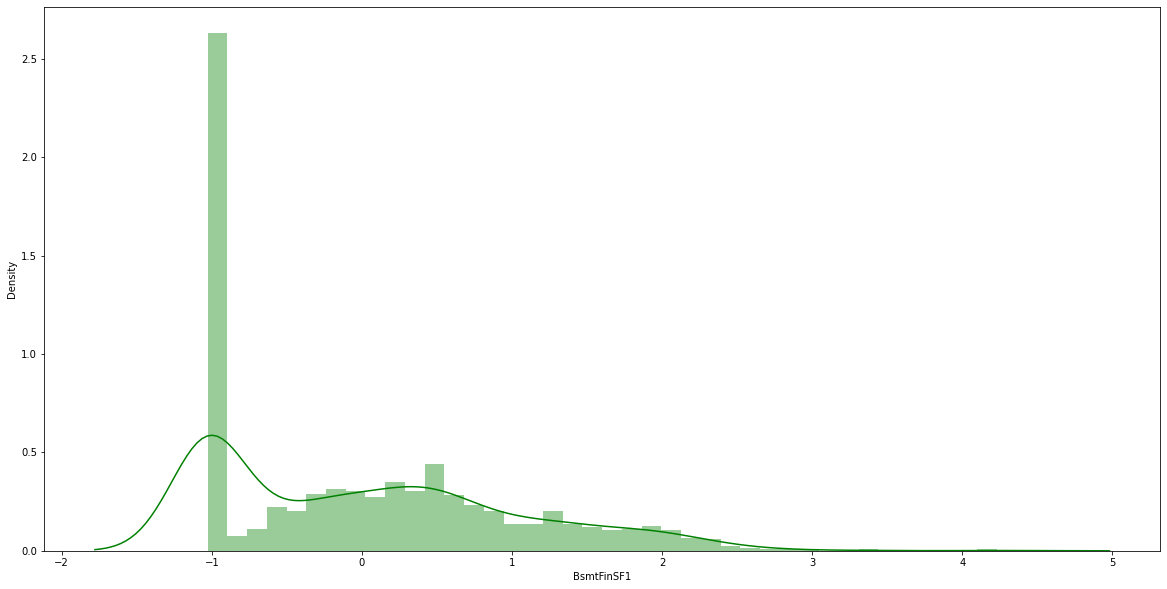

In [163]:
sns.distplot(xtrain11['BsmtFinSF1'],color='green' , bins=40)
plt.show()

In [164]:
yy = pd.DataFrame(xtrain11['MasVnrArea'])

In [165]:
yy.head()

,MasVnrArea
0,0.0
1,0.0
2,0.0
3,0.0
4,203.0


In [166]:
yy['MasVnrArea'] = np.where(yy['MasVnrArea']==0,0.1,yy['MasVnrArea'])

In [167]:
yy['MasVnrArea3'] = np.log10(yy['MasVnrArea'])

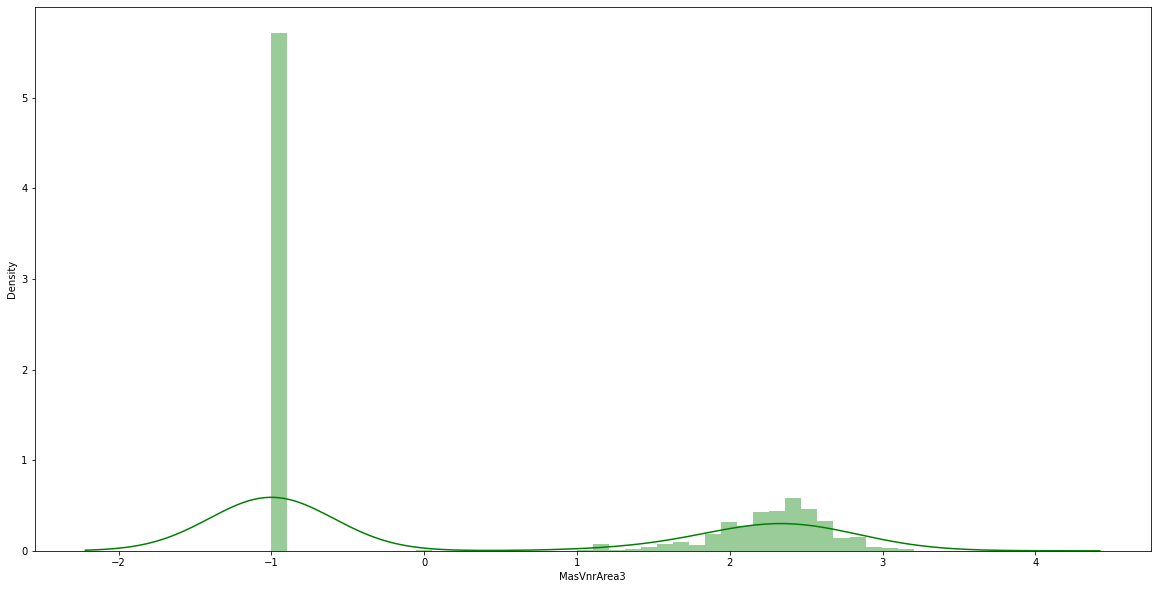

In [168]:
sns.distplot(yy['MasVnrArea3'],color='green' , bins=40)
plt.show()

In [169]:
xt.head()

,LotArea,LotShape,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,LotFrontage_random,MasVnrArea
0,-0.746475,1,4,3,-0.829775,-0.600656,1,2,4,3,7,1.305336,-0.642618,5,1,0.345415,-0.804064,1,1,2,1,4,1,4,1,-0.183130,4,1.667466,-0.700742,-0.367671,-0.120502,0.731439,0.0
1,-0.326700,2,2,3,0.427199,-1.137199,1,2,2,5,5,0.591093,-0.933631,4,1,-0.812427,-0.804064,1,1,2,1,2,0,2,1,-2.247917,1,0.177390,-0.700742,-0.367671,-1.611809,-0.841598,0.0
2,-0.146643,1,2,3,1.055686,1.691849,1,2,2,3,4,-0.553558,-0.485564,3,1,-1.240267,0.467486,0,1,2,1,2,0,2,1,-0.906524,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643,0.0
3,-0.210776,1,2,3,1.684173,1.691849,1,2,2,2,4,-0.353477,-1.307790,3,0,-1.935506,-0.804064,0,1,1,1,1,0,2,1,-1.069407,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643,0.0
4,-0.264802,1,2,3,-0.234367,0.326102,3,2,2,2,6,-0.541926,-0.238434,3,1,-1.309791,0.848952,0,1,3,1,2,1,4,2,-0.140014,4,-0.740184,-0.700742,-0.367671,1.370804,0.207093,203.0


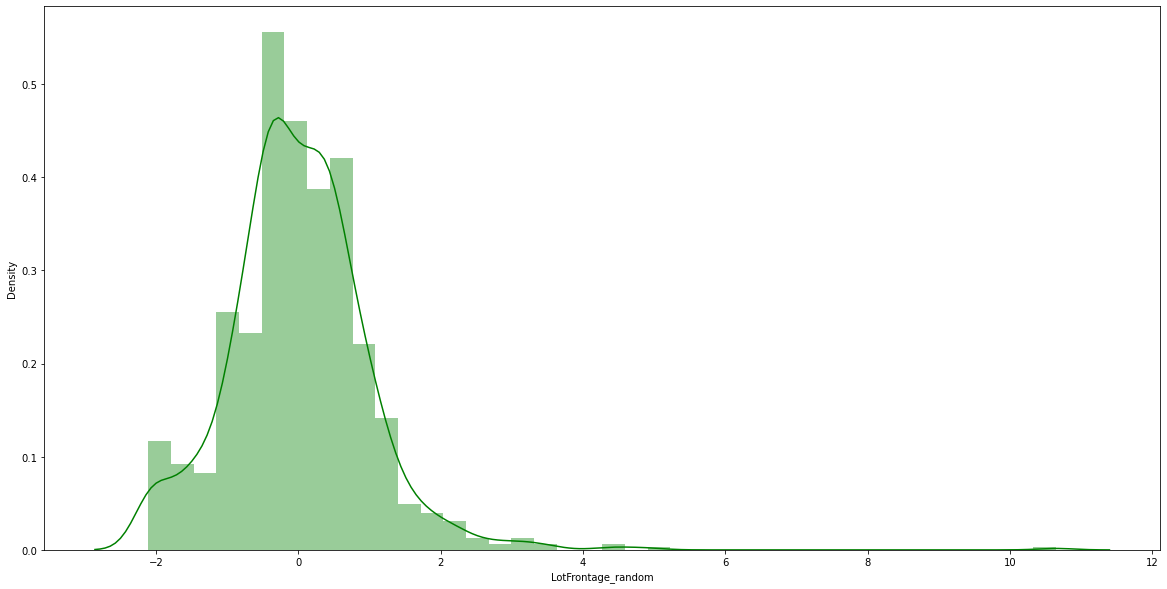

In [176]:
sns.distplot(xt['LotFrontage_random'],color='green' , bins=40)
plt.show()

In [179]:
xtrain11['MasVnrArea'] = np.where(xtrain11['MasVnrArea']==0,0.1,xtrain11['MasVnrArea'])
xtrain11['MasVnrArea'] = np.log10(xtrain11['MasVnrArea'])
xtrain11['MasVnrArea'] = round(xtrain11['MasVnrArea'],3)

In [181]:
xtrain11.head()

,LotArea,LotShape,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,LotFrontage_random,MasVnrArea
0,-0.746475,1,4,3,-0.829775,-0.600656,1,2,4,3,7,1.305336,-0.642618,5,1,0.345415,-0.804064,1,1,2,1,4,1,4,1,-0.183130,4,1.667466,-0.700742,-0.367671,-0.120502,0.731439,-1.000
1,-0.326700,2,2,3,0.427199,-1.137199,1,2,2,5,5,0.591093,-0.933631,4,1,-0.812427,-0.804064,1,1,2,1,2,0,2,1,-2.247917,1,0.177390,-0.700742,-0.367671,-1.611809,-0.841598,-1.000
2,-0.146643,1,2,3,1.055686,1.691849,1,2,2,3,4,-0.553558,-0.485564,3,1,-1.240267,0.467486,0,1,2,1,2,0,2,1,-0.906524,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643,-1.000
3,-0.210776,1,2,3,1.684173,1.691849,1,2,2,2,4,-0.353477,-1.307790,3,0,-1.935506,-0.804064,0,1,1,1,1,0,2,1,-1.069407,4,-0.740184,-0.700742,-0.367671,-0.866155,-0.404643,-1.000
4,-0.264802,1,2,3,-0.234367,0.326102,3,2,2,2,6,-0.541926,-0.238434,3,1,-1.309791,0.848952,0,1,3,1,2,1,4,2,-0.140014,4,-0.740184,-0.700742,-0.367671,1.370804,0.207093,2.307


## Linear Regression

In [183]:
x_train1 = xtrain11['Neighborhood']

In [184]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     997.7
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          3.19e-153
Time:                        10:06:33   Log-Likelihood:                -12603.
No. Observations:                1021   AIC:                         2.521e+04
Df Residuals:                    1019   BIC:                         2.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.653e+04   4585.735     10.147   

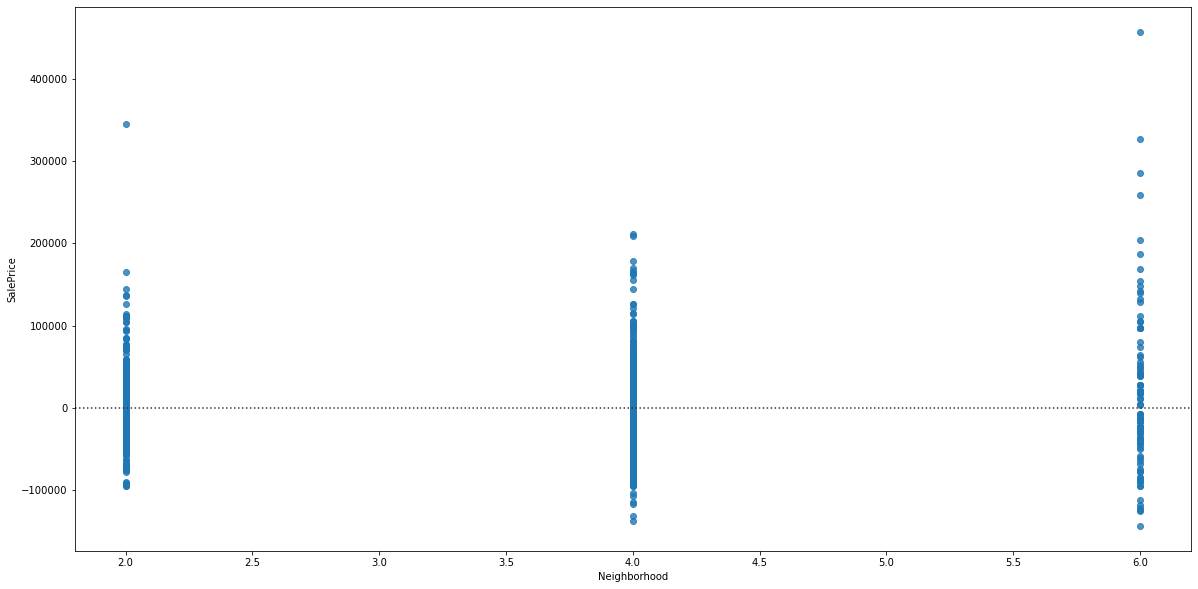

In [185]:
sns.residplot(xtrain11['Neighborhood'],y_train)
plt.show()

In [186]:
x_train1 = xtrain11['GarageArea']

In [187]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     726.0
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          3.56e-121
Time:                        10:06:39   Log-Likelihood:                -12677.
No. Observations:                1021   AIC:                         2.536e+04
Df Residuals:                    1019   BIC:                         2.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.805e+05   1870.307     96.534      0.0

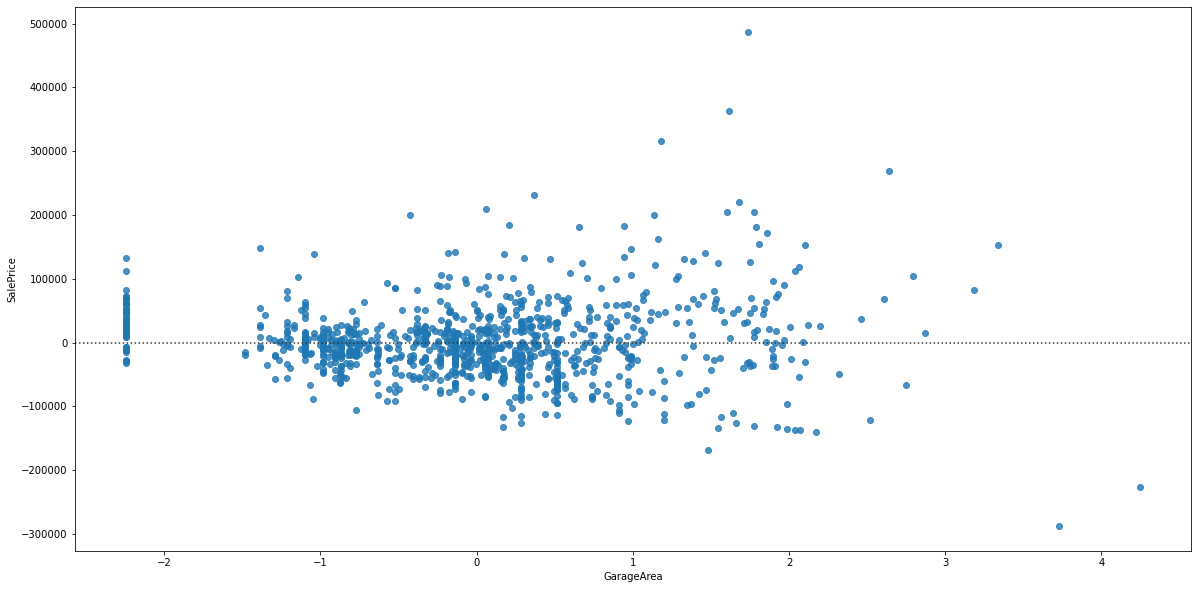

In [188]:
sns.residplot(xtrain11['GarageArea'],y_train)
plt.show()

In [190]:
# LET'S DO lOG TRANSFORMATION OF Y_TRAIN TO REMOVE HETEROSCDESTICITY

In [191]:
y_train_log = np.log(y_train)

In [192]:
y_train_log = pd.DataFrame(y_train_log)

In [193]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train_log,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     811.7
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          8.50e-132
Time:                        10:06:52   Log-Likelihood:                -219.32
No. Observations:                1021   AIC:                             442.6
Df Residuals:                    1019   BIC:                             452.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0221      0.009   1279.424      0.0

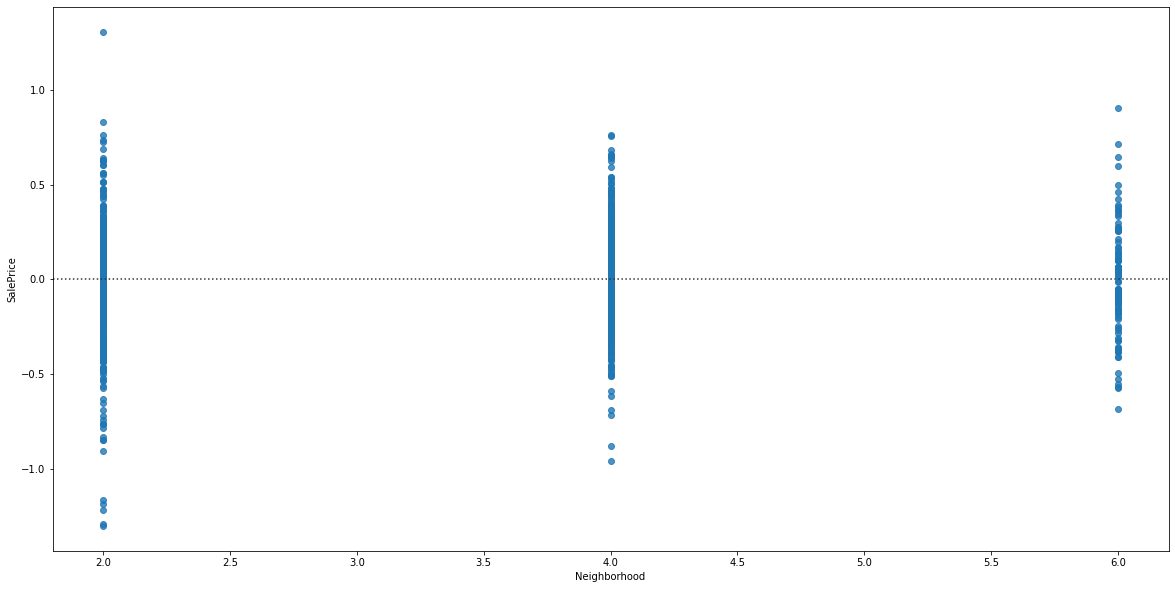

In [194]:
sns.residplot(xtrain11['Neighborhood'],y_train_log)
plt.show()

In [195]:
x_train1 = xtrain11['GarageArea']

In [196]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train_log,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     811.7
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          8.50e-132
Time:                        10:07:00   Log-Likelihood:                -219.32
No. Observations:                1021   AIC:                             442.6
Df Residuals:                    1019   BIC:                             452.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0221      0.009   1279.424      0.0

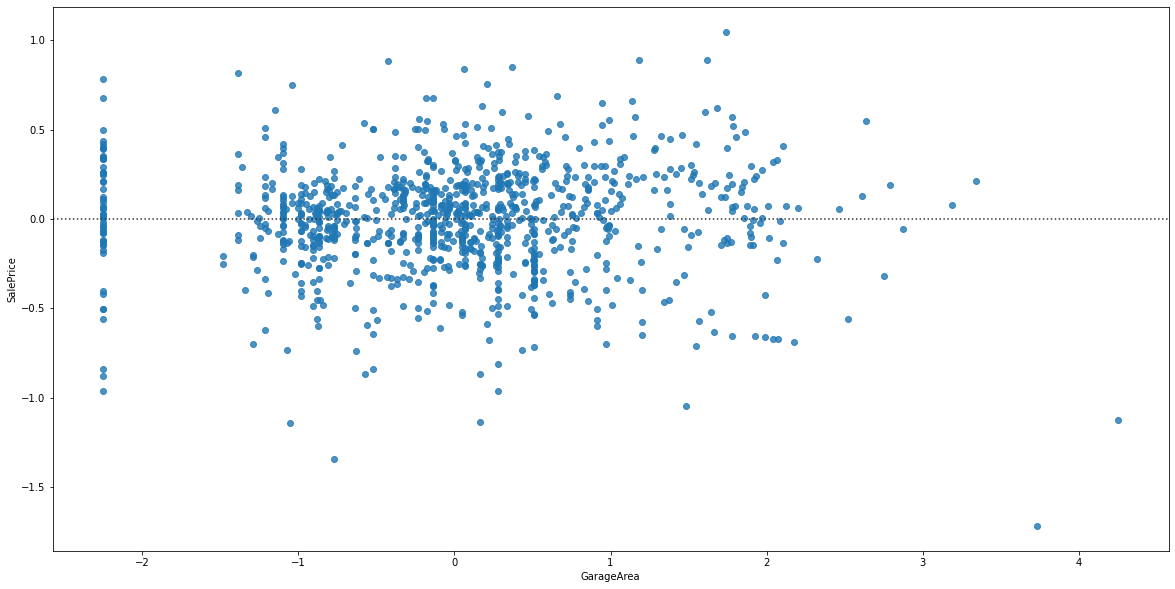

In [197]:
sns.residplot(xtrain11['GarageArea'],y_train_log)
plt.show()

## With heteroscdestacity (i.e. without log transfor of y_train)

In [200]:
x_train1 = xtrain11['Neighborhood']
# choose 'Neighborhood' based on ANOVA/F score.

In [201]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     997.7
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          3.19e-153
Time:                        10:08:11   Log-Likelihood:                -12603.
No. Observations:                1021   AIC:                         2.521e+04
Df Residuals:                    1019   BIC:                         2.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.653e+04   4585.735     10.147   

In [202]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual']]

In [203]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     515.5
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          1.37e-203
Time:                        10:09:18   Log-Likelihood:                -12480.
No. Observations:                1021   AIC:                         2.497e+04
Df Residuals:                    1017   BIC:                         2.499e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.642e+04   4453.280      3.687   

In [205]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual']]

In [206]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     360.6
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          3.69e-222
Time:                        10:09:27   Log-Likelihood:                -12430.
No. Observations:                1021   AIC:                         2.487e+04
Df Residuals:                    1015   BIC:                         2.490e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -3.1e+04   7900.999     -3.924   

In [207]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea']]

In [208]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     372.1
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          3.48e-252
Time:                        10:09:36   Log-Likelihood:                -12357.
No. Observations:                1021   AIC:                         2.473e+04
Df Residuals:                    1014   BIC:                         2.476e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.076e+04   8087.513      1.330   

In [209]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces']]

In [210]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     419.6
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          3.99e-315
Time:                        10:10:39   Log-Likelihood:                -12205.
No. Observations:                1021   AIC:                         2.443e+04
Df Residuals:                    1012   BIC:                         2.447e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.523e+04   7023.659      3.592   

In [211]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
                    'MasVnrArea']]

In [212]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     373.9
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          2.17e-314
Time:                        10:11:04   Log-Likelihood:                -12203.
No. Observations:                1021   AIC:                         2.443e+04
Df Residuals:                    1011   BIC:                         2.448e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.541e+04   7018.595      3.621   

In [213]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
                    'BsmtExposure']]

In [214]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     377.1
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          7.98e-316
Time:                        10:12:10   Log-Likelihood:                -12200.
No. Observations:                1021   AIC:                         2.442e+04
Df Residuals:                    1011   BIC:                         2.447e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.799e+04   7383.309      2.436   

In [215]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
                    'BsmtFinSF1']]

In [216]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     382.5
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          3.21e-318
Time:                        10:12:38   Log-Likelihood:                -12195.
No. Observations:                1021   AIC:                         2.441e+04
Df Residuals:                    1011   BIC:                         2.446e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.704e+04   6968.143      3.881   

In [221]:
x_train1 = xtrain11[['LotArea','Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF',
                     'Fireplaces'
                    ]]

In [222]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     386.5
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          5.55e-320
Time:                        10:15:34   Log-Likelihood:                -12190.
No. Observations:                1021   AIC:                         2.440e+04
Df Residuals:                    1011   BIC:                         2.445e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.608e+04   6930.519      3.763   

In [223]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
                    '2ndFlrSF']]

In [224]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     529.5
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:16:11   Log-Likelihood:                -12062.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                    1011   BIC:                         2.419e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.09e+04   6169.318      6.629   

In [225]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
                    '2ndFlrSF','KitchenAbvGr']]

In [226]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     480.5
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:16:30   Log-Likelihood:                -12058.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                    1010   BIC:                         2.419e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.145e+04   1.25e+04      5.698   

In [229]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
                    '2ndFlrSF','CentralAir']]

In [228]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     437.6
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:18:08   Log-Likelihood:                -12057.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                    1009   BIC:                         2.420e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.362e+04   1.35e+04      4.700   

In [230]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
                    '2ndFlrSF']]

#  Final 

In [231]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     529.5
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:19:06   Log-Likelihood:                -12062.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                    1011   BIC:                         2.419e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.09e+04   6169.318      6.629   

In [232]:
white_test = het_white(lm_2.resid,  lm_2.model.exog)

bp_test = het_breuschpagan(lm_2.resid,lm_2.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))

{'LM Statistic': 188.84320029478675, 'LM-Test p-value': 7.187040403091606e-36, 'F-Statistic': 25.492054110430196, 'F-Test p-value': 8.982567497428382e-40}
{'LM Statistic': 681.8756126680304, 'LM-Test p-value': 1.6250418301427221e-109, 'F-Statistic': 35.96909431087533, 'F-Test p-value': 5.551106928681976e-193}


In [233]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
                    '2ndFlrSF']]

In [234]:
lm = LinearRegression()
lm.fit(x_train1,y_train)

LinearRegression()

In [235]:
y_pred_train = lm.predict(x_train1)

In [236]:
r2_score(y_train,y_pred_train)

0.8249771707422134

## With log transformation of y_train

In [238]:
y_train_log = np.log(y_train)
y_train_log = pd.DataFrame(y_train_log)

In [239]:
x_train1 = xtrain11[['Neighborhood']]

In [240]:
x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train_log,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     1007.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          2.95e-154
Time:                        10:19:17   Log-Likelihood:                -167.56
No. Observations:                1021   AIC:                             339.1
Df Residuals:                    1019   BIC:                             349.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.3308      0.024    481.285   

In [241]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual']]

In [242]:
# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [243]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType']]

In [244]:
# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [245]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual']]

In [246]:
# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [247]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea']]

# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [248]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF']]

# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [249]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces']]

# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [250]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
#                     'MasVnrArea']]

# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [251]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
#                     'BsmtExposure']]

# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [252]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
#                     'BsmtFinSF1']]

# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [253]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
#                     'BsmtUnfSF']]

# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [254]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
#                     '2ndFlrSF']]

# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [255]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
#                     '2ndFlrSF','KitchenAbvGr']]

# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

In [256]:
# x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
#                     '2ndFlrSF']]

# x_train1 = sm.add_constant(x_train1)
# lm_2 = sm.OLS(y_train_log,x_train1).fit()
# print(lm_2.summary())

# Final

In [257]:
x_train1 = xtrain11.copy()

x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train_log,x_train1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     191.6
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:19:27   Log-Likelihood:                 503.77
No. Observations:                1021   AIC:                            -939.5
Df Residuals:                     987   BIC:                            -772.0
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.0269      0

In [258]:
x_train1 = xtrain11[['Neighborhood','ExterQual','BsmtQual','BldgType','KitchenQual','GarageArea','1stFlrSF','Fireplaces',
                    '2ndFlrSF']]

x_train1 = sm.add_constant(x_train1)
lm_2 = sm.OLS(y_train_log,x_train1).fit()
print(lm_2.summary())

# Final

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     511.7
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:19:29   Log-Likelihood:                 356.98
No. Observations:                1021   AIC:                            -694.0
Df Residuals:                    1011   BIC:                            -644.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.3320      0.032    351.978   

In [259]:
white_test = het_white(lm_2.resid,  lm_2.model.exog)

bp_test = het_breuschpagan(lm_2.resid,lm_2.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))

{'LM Statistic': 47.03438983746373, 'LM-Test p-value': 3.8671932740329653e-07, 'F-Statistic': 5.424760111252837, 'F-Test p-value': 2.7303193753303973e-07}
{'LM Statistic': 358.41262146522047, 'LM-Test p-value': 1.6628684157125947e-46, 'F-Statistic': 9.676615899241993, 'F-Test p-value': 1.0292347803909109e-59}
